<a href="https://colab.research.google.com/github/dangdang2222/DL_Computer_Vision/blob/main/selective_search_n_iou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selectivesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4349 sha256=6dad9f4a0b0383c532f71b61d9f563467c546ed0f9cdd981d2ee043d3d94d9f0
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [9]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

--2022-06-08 12:20:45--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0s      

2022-06-08 12:20:45 (97.7 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



image shape: (450, 375, 3)


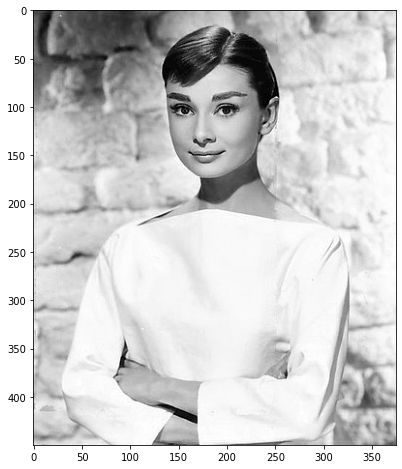

In [12]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shape:',img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [13]:
import selectivesearch

_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions),len(regions))


<class 'list'> 41


In [15]:
regions

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


In [16]:
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


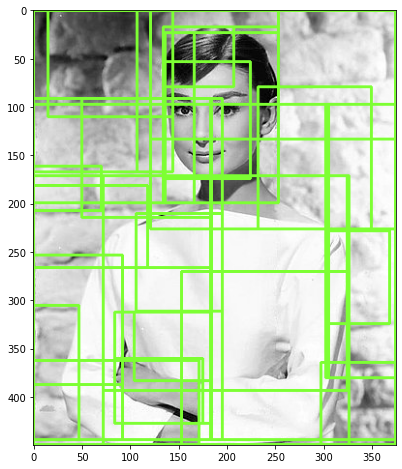

In [19]:
green_rgb = (125,255,51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = rect[2]+left
  bottom = rect[3]+top

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left,top), (right,bottom), color= green_rgb, thickness=2)
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

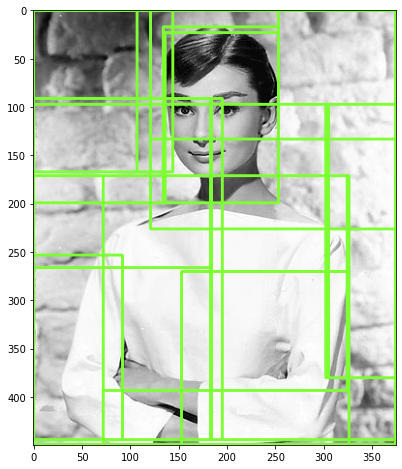

In [23]:
cand_rects = [cand['rect'] for cand in regions if cand['size']>10000]

green_rgb = (125,255,51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left+rect[2]
  bottom = top+rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left,top),(right,bottom),color = green_rgb,thickness = 2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

In [24]:
import numpy as np 

def compute_iou(cand_box, gt_box):
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.minimum(cand_box[2], gt_box[2])
  y2 = np.minimum(cand_box[3], gt_box[3])

  intersection = np.maximum(x2-x1, 0) * np.maximum(y2-y1,0)

  cand_box_area = (cand_box[2]-cand_box[0])*(cand_box[3]-cand_box[1])
  gt_box_area = (gt_box[2]-gt_box[0])*(gt_box[3]-gt_box[1])
  union = cand_box_area+gt_box_area - intersection

  iou = intersection/union

  return iou

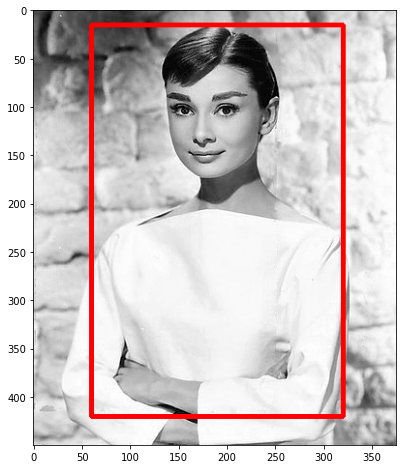

In [26]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

gt_box = [60,15,320,420]

img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255,0,0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0],gt_box[1]),(gt_box[2],gt_box[3]),color = red, thickness=3)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [27]:
import selectivesearch

img = cv2.imread('./data/audrey01.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb2, scale=100, min_size=2000)

print(type(regions),len(regions))

<class 'list'> 41


In [28]:
[cand['rect'] for cand in regions]

[(0, 0, 107, 167),
 (15, 0, 129, 110),
 (121, 0, 253, 133),
 (134, 17, 73, 62),
 (166, 23, 87, 176),
 (136, 53, 88, 121),
 (232, 79, 117, 147),
 (50, 91, 133, 123),
 (305, 97, 69, 283),
 (0, 161, 70, 46),
 (72, 171, 252, 222),
 (0, 181, 118, 85),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (0, 253, 92, 134),
 (153, 270, 173, 179),
 (0, 305, 47, 139),
 (104, 312, 80, 71),
 (84, 360, 91, 67),
 (0, 362, 171, 87),
 (297, 364, 77, 85),
 (0, 91, 183, 175),
 (136, 23, 117, 176),
 (72, 171, 254, 278),
 (134, 17, 119, 182),
 (302, 97, 72, 283),
 (121, 0, 253, 226),
 (0, 91, 183, 175),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 253, 92, 191),
 (0, 91, 183, 353),
 (0, 171, 326, 278),
 (0, 97, 374, 352),
 (84, 312, 100, 115),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449)]

In [29]:
[cand['rect'] for cand in regions]

[(0, 0, 107, 167),
 (15, 0, 129, 110),
 (121, 0, 253, 133),
 (134, 17, 73, 62),
 (166, 23, 87, 176),
 (136, 53, 88, 121),
 (232, 79, 117, 147),
 (50, 91, 133, 123),
 (305, 97, 69, 283),
 (0, 161, 70, 46),
 (72, 171, 252, 222),
 (0, 181, 118, 85),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (0, 253, 92, 134),
 (153, 270, 173, 179),
 (0, 305, 47, 139),
 (104, 312, 80, 71),
 (84, 360, 91, 67),
 (0, 362, 171, 87),
 (297, 364, 77, 85),
 (0, 91, 183, 175),
 (136, 23, 117, 176),
 (72, 171, 254, 278),
 (134, 17, 119, 182),
 (302, 97, 72, 283),
 (121, 0, 253, 226),
 (0, 91, 183, 175),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 253, 92, 191),
 (0, 91, 183, 353),
 (0, 171, 326, 278),
 (0, 97, 374, 352),
 (84, 312, 100, 115),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449)]

In [30]:
cand_rects = [cand['rect'] for cand in regions]

for index, cand_box in enumerate(cand_rects):
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  print('index:',index, "iou:", iou)

index: 0 iou: 0.06157293686705451
index: 1 iou: 0.07156308851224105
index: 2 iou: 0.2033654637255666
index: 3 iou: 0.04298195631528965
index: 4 iou: 0.14541310541310543
index: 5 iou: 0.10112060778727446
index: 6 iou: 0.11806905615946989
index: 7 iou: 0.1420163334272036
index: 8 iou: 0.035204259342190375
index: 9 iou: 0.004256894317971497
index: 10 iou: 0.5184766640298338
index: 11 iou: 0.04465579710144928
index: 12 iou: 0.0853656220322887
index: 13 iou: 0.015722240419259743
index: 14 iou: 0.037833068643021
index: 15 iou: 0.22523535071077264
index: 16 iou: 0.0
index: 17 iou: 0.053941120607787274
index: 18 iou: 0.05154006626579948
index: 19 iou: 0.05660327592118798
index: 20 iou: 0.01165009904393209
index: 21 iou: 0.18588082901554404
index: 22 iou: 0.19555555555555557
index: 23 iou: 0.5409250175192712
index: 24 iou: 0.205679012345679
index: 25 iou: 0.042245111210628454
index: 26 iou: 0.34848824374009246
index: 27 iou: 0.18588082901554404
index: 28 iou: 0.10952135872362326
index: 29 iou: 

In [31]:
cand_rects = [cand['rect'] for cand in regions if cand['size']>5000]
cand_rects.sort()
cand_rects

[(0, 0, 107, 167),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 91, 183, 175),
 (0, 91, 183, 175),
 (0, 91, 183, 353),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 97, 374, 352),
 (0, 171, 326, 278),
 (0, 181, 118, 85),
 (0, 253, 92, 134),
 (0, 253, 92, 191),
 (0, 362, 171, 87),
 (15, 0, 129, 110),
 (50, 91, 133, 123),
 (72, 171, 252, 222),
 (72, 171, 254, 278),
 (84, 312, 100, 115),
 (121, 0, 253, 133),
 (121, 0, 253, 226),
 (134, 17, 119, 182),
 (136, 23, 117, 176),
 (153, 270, 173, 179),
 (166, 23, 87, 176),
 (232, 79, 117, 147),
 (297, 364, 77, 85),
 (302, 97, 72, 283),
 (305, 97, 69, 283)]

index: 8 iou: 0.5184766640298338 rectangle: (72, 171, 324, 393)
index: 18 iou: 0.5409250175192712 rectangle: (72, 171, 326, 449)
index: 28 iou: 0.5490037131949166 rectangle: (0, 97, 374, 449)
index: 32 iou: 0.6341234282410753 rectangle: (0, 0, 374, 444)
index: 33 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 34 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 35 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)


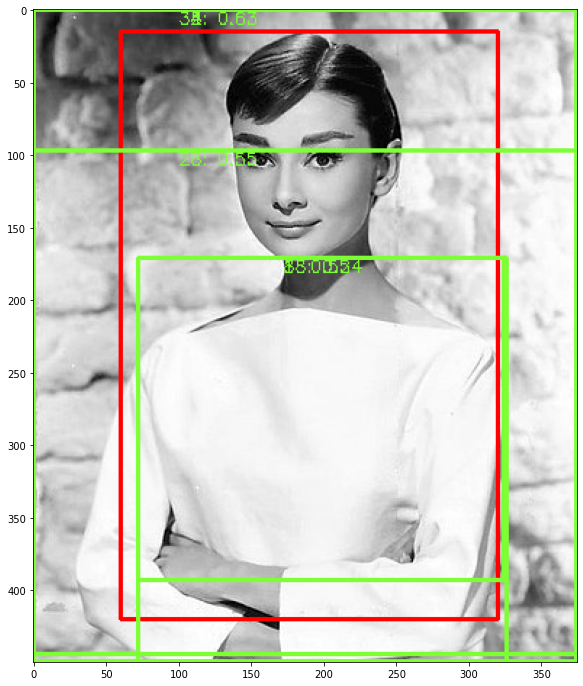

In [33]:
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

green_rgb = (125,255,51)
cand_rects = [cand['rect'] for cand in regions if cand['size']>3000]
gt_box = [60,15,320,420]

img_rgb = cv2.rectangle(img_rgb, (gt_box[0],gt_box[1]),(gt_box[2],gt_box[3]),color = red, thickness=2)

for index, cand_box in enumerate(cand_rects):
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  
  if iou>0.5:
    print('index:',index,'iou:',iou,'rectangle:',(cand_box[0],cand_box[1],cand_box[2],cand_box[3]))
    cv2.rectangle(img_rgb, (cand_box[0],cand_box[1]),(cand_box[2],cand_box[3]),color=green_rgb, thickness=2)
    text = "{}: {:.2f}".format(index,iou)
    cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
  

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()